170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/10
391/391 [==============================] - 222s 563ms/step - loss: 0.0124 - val_loss: 0.0078
Epoch 2/10
391/391 [==============================] - 217s 556ms/step - loss: 0.0073 - val_loss: 0.0071
Epoch 3/10
391/391 [==============================] - 209s 534ms/step - loss: 0.0066 - val_loss: 0.0063
Epoch 4/10
391/391 [==============================] - 217s 555ms/step - loss: 0.0062 - val_loss: 0.0060
Epoch 5/10
391/391 [==============================] - 215s 550ms/step - loss: 0.0059 - val_loss: 0.0060
Epoch 6/10
391/391 [==============================] - 212s 542ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 7/10
391/391 [==============================] - 212s 542ms/step - loss: 0.0056 - val_loss: 0.0054
Epoch 8/10
391/391 [==============================] - 212s 541ms/step - loss: 0.0054 - val_loss: 0.0053
Epoch 9/10
391/391 [==============================] - 214s 548ms/step - loss: 0.0053 - val_loss: 0.00

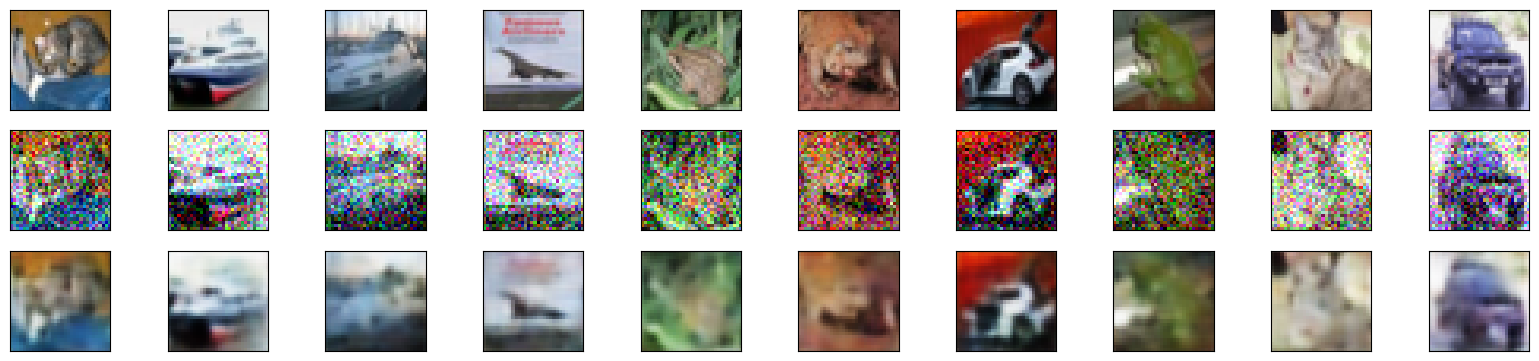

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Add
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

# Load  the dataset (CIFAR-10)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# preprocess the dataset
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Add Gaussian noise to images
mean = 0
stddev = 0.2

# generate the Gaussian noise with the same size of x
noise_train = np.random.normal(mean, stddev, x_train.shape)
noise_test = np.random.normal(mean, stddev, x_test.shape)

# Add the generated Gaussian noise to the original training and testing images
x_train_noisy = x_train + noise_train
x_test_noisy = x_test + noise_test

# Clip the pixel values to be in the range [0, 1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define the autoencoder architecture for RGB images
input_img = Input(shape=(32, 32, 3))

# Encoder
#The padding ->'same' means the dimensions of the output feature map will be the same as the input
# 2D max-pooling layer -> reduce the dimensions of the feature map and keeping the most important information while removing some details
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder (Adding noise to the original images)
#upsampling layer -> to increase the dimensions of the feature map (recover the information lost during the downsampling process in the encoder)
#The final convolutional layer with 3 filters (corresponding to the RGB channels)
x1 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x1 = UpSampling2D((2, 2))(x1)
x1 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)
x1 = UpSampling2D((2, 2))(x1)
decoded_1 = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x1)

#create the autoencoder model (case1)
# The model takes original images as input and aims to reconstruct them after the encoding and decoding process.
autoencoder_1 = Model(input_img, decoded_1)
autoencoder_1.compile(optimizer=Adam(), loss='mse')

# Train the autoencoders
autoencoder_1.fit(x_train_noisy, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))

# Denoise images using the trained autoencoders
denoised_images_1 = autoencoder_1.predict(x_test_noisy)

# Visualize the results
n = 10  # number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display original images
    ax = plt.subplot(4, n, i + 1)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display noisy images
    ax = plt.subplot(4, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display denoised images (case1)
    ax = plt.subplot(4, n, i + 1 + 2 * n)
    plt.imshow(denoised_images_1[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
"""
** CNN-based autoencoder produced denoised images with better preservation of details and structures compared to the Dense-based autoencoder.
** measuring the Mean Squared Error (MSE) between the original test images and the denoised images produced by each autoencoder resulted in :
 The CNN-based autoencoder achieved lower MSE values, indicating that the denoised and original images are nearly same.
 """


